In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv("D:\Projects Data analytics\customer segmentation\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Data Preprocessing

X = df[['Annual Income (k$)' , 'Spending Score (1-100)']]

Scaler = StandardScaler()
X_Scaled = Scaler.fit_transform(X)

In [4]:
#Finding Optimal cluster (Elbow Method)

wcss = [] # within cluster sum of square
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_Scaled)
    wcss.append(kmeans.inertia_)


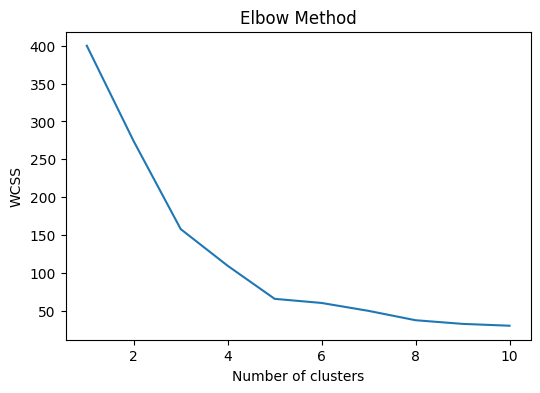

In [5]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss,)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
#Train K-Means Model

kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
df['cluster']=kmeans.fit_predict(X_Scaled)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [8]:
#Cluster-wise summary table
cluster_summary = df.groupby('cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Customer Count'})
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)  Customer Count
cluster                                                            
0                 55.296296               49.518519              81
1                 86.538462               82.128205              39
2                 25.727273               79.363636              22
3                 88.200000               17.114286              35
4                 26.304348               20.913043              23


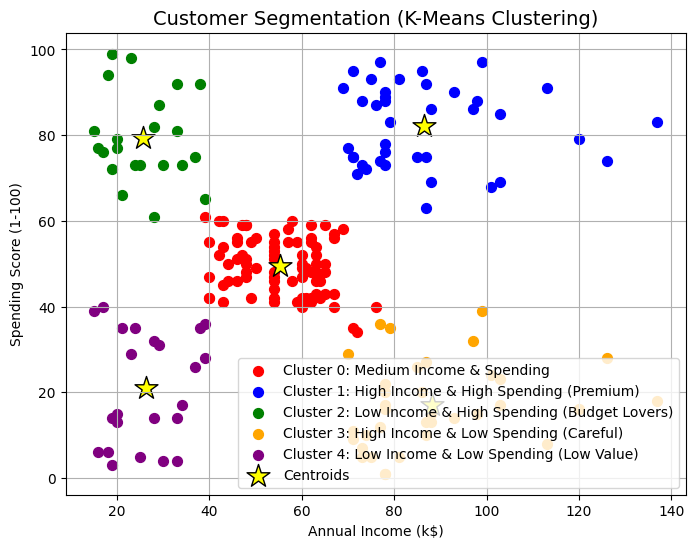

In [9]:
plt.figure(figsize=(8,6))

colors = ['red', 'blue', 'green', 'orange', 'purple']
labels = [
    'Cluster 0: Medium Income & Spending',
    'Cluster 1: High Income & High Spending (Premium)',
    'Cluster 2: Low Income & High Spending (Budget Lovers)',
    'Cluster 3: High Income & Low Spending (Careful)',
    'Cluster 4: Low Income & Low Spending (Low Value)'
]

for cluster in range(5):
    plt.scatter(
        df[df['cluster'] == cluster]['Annual Income (k$)'],
        df[df['cluster'] == cluster]['Spending Score (1-100)'],
        s=50,
        c=colors[cluster],
        label=labels[cluster]
    )

# Plot centroids
centers = Scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0], centers[:, 1],
    s=300, c='yellow', marker='*', edgecolor='black', label='Centroids'
)

plt.title('Customer Segmentation (K-Means Clustering)', fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

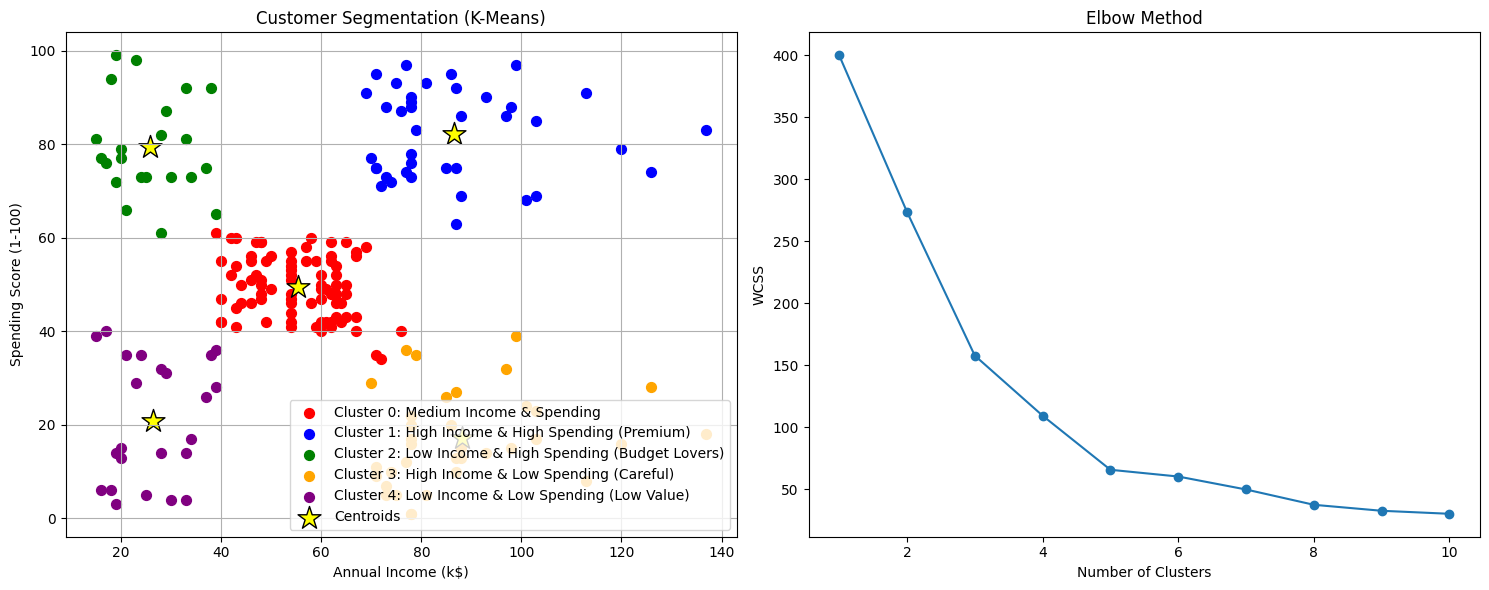

In [16]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Data Preprocessing

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Scaler = StandardScaler()
X_Scaled = Scaler.fit_transform(X)


# Elbow Method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_Scaled)
    wcss.append(kmeans.inertia_)

# KMeans with Optimal Cluste

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_Scaled)
df['cluster'] = y_kmeans


# Side-by-side Plots (Cluster LEFT, Elbow RIGHT)

fig, axes = plt.subplots(1, 2, figsize=(15,6))

# (1) Scatter Plot of Clusters (LEFT)
colors = ['red', 'blue', 'green', 'orange', 'purple']
labels = [
    'Cluster 0: Medium Income & Spending',
    'Cluster 1: High Income & High Spending (Premium)',
    'Cluster 2: Low Income & High Spending (Budget Lovers)',
    'Cluster 3: High Income & Low Spending (Careful)',
    'Cluster 4: Low Income & Low Spending (Low Value)'
]

for cluster in range(5):
    axes[0].scatter(
        df[df['cluster'] == cluster]['Annual Income (k$)'],
        df[df['cluster'] == cluster]['Spending Score (1-100)'],
        s=50, c=colors[cluster], label=labels[cluster]
    )

# Centroids
centers = Scaler.inverse_transform(kmeans.cluster_centers_)
axes[0].scatter(
    centers[:, 0], centers[:, 1],
    s=300, c='yellow', marker='*', edgecolor='black', label='Centroids'
)

axes[0].set_title('Customer Segmentation (K-Means)', fontsize=12)
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].legend()
axes[0].grid(True)

# (2) Elbow Plot (RIGHT)
axes[1].plot(range(1, 11), wcss, marker='o')
axes[1].set_title('Elbow Method', fontsize=12)
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('WCSS')

plt.tight_layout()
plt.show()
